In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
# csv 파일 Load
import pandas as pd
df = pd.read_csv("/content/gdrive/My Drive/AppleStore.csv")

# **Data Preperation**





In [ ]:
# 가능한 평점 레이블 알아오기
categorys = {}
def getCategorys(x):
    if not (x in categorys):
        categorys[x] = len(categorys)

df['user_rating'].apply(getCategorys)
categorys

{0.0: 7,
 1.0: 9,
 1.5: 8,
 2.0: 5,
 2.5: 6,
 3.0: 4,
 3.5: 1,
 4.0: 0,
 4.5: 2,
 5.0: 3}

In [ ]:
# 장르에 고유값(0~22)을 메김
categorys = {}
def getCategorys(x):
    if not (x in categorys):
        categorys[x] = len(categorys)

df['prime_genre'].apply(getCategorys)
categorys

{'Book': 20,
 'Business': 11,
 'Catalogs': 22,
 'Education': 16,
 'Entertainment': 13,
 'Finance': 5,
 'Food & Drink': 18,
 'Games': 0,
 'Health & Fitness': 12,
 'Lifestyle': 17,
 'Medical': 21,
 'Music': 6,
 'Navigation': 15,
 'News': 19,
 'Photo & Video': 14,
 'Productivity': 1,
 'Reference': 4,
 'Shopping': 3,
 'Social Networking': 9,
 'Sports': 10,
 'Travel': 8,
 'Utilities': 7,
 'Weather': 2}

In [ ]:
# prime_genre 컬럼의 장르이름을 인덱싱된 숫자로 바꿔주는 구문
def ReplaceString(x):
    for category in categorys:
        x = x.replace(category,str(categorys[category]))
    return x

df['prime_genre'] = df['prime_genre'].apply(ReplaceString)
df

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,0,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,1,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,2,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,3,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,4,37,5,45,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7192,11081,1187617475,Kubik,126644224,USD,0.00,142,75,4.5,4.5,1.3,4+,0,38,5,1,1
7193,11082,1187682390,VR Roller-Coaster,120760320,USD,0.00,30,30,4.5,4.5,0.9,4+,0,38,0,1,1
7194,11087,1187779532,Bret Michaels Emojis + Lyric Keyboard,111322112,USD,1.99,15,0,4.5,0.0,1.0.2,9+,7,37,1,1,1
7195,11089,1187838770,VR Roller Coaster World - Virtual Reality,97235968,USD,0.00,85,32,4.5,4.5,1.0.15,12+,0,38,0,2,1


In [ ]:
# current 열의 인자가 어떤게 있는지 확인하기 위한 code
i = 0
categorys = {}
df['currency'].apply(getCategorys)
categorys

{'USD': 0}

In [ ]:
# current column을 전부 'USD' : 0 으로 바꿈.
df['currency'] = df['currency'].apply(ReplaceString)
df

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,0,3.99,21292,26,4.0,4.5,6.3.5,4+,0,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,0,0.00,161065,26,4.0,3.5,8.2.2,4+,1,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0,0.00,188583,2822,3.5,4.5,5.0.0,4+,2,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0,0.00,262241,649,4.0,4.5,5.10.0,12+,3,37,5,9,1
4,5,282935706,Bible,92774400,0,0.00,985920,5320,4.5,5.0,7.5.1,4+,4,37,5,45,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7192,11081,1187617475,Kubik,126644224,0,0.00,142,75,4.5,4.5,1.3,4+,0,38,5,1,1
7193,11082,1187682390,VR Roller-Coaster,120760320,0,0.00,30,30,4.5,4.5,0.9,4+,0,38,0,1,1
7194,11087,1187779532,Bret Michaels Emojis + Lyric Keyboard,111322112,0,1.99,15,0,4.5,0.0,1.0.2,9+,7,37,1,1,1
7195,11089,1187838770,VR Roller Coaster World - Virtual Reality,97235968,0,0.00,85,32,4.5,4.5,1.0.15,12+,0,38,0,2,1


In [ ]:
# Base dataframe = df
# regression용 dataframe = df_reg
df_reg = df.drop(['currency','track_name','rating_count_ver','user_rating_ver','ver','vpp_lic'], axis = 1)

In [ ]:
df_reg

,Unnamed: 0,id,size_bytes,price,rating_count_tot,user_rating,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num
0,1,281656475,100788224,3.99,21292,4.0,4+,0,38,5,10
1,2,281796108,158578688,0.00,161065,4.0,4+,1,37,5,23
2,3,281940292,100524032,0.00,188583,3.5,4+,2,37,5,3
3,4,282614216,128512000,0.00,262241,4.0,12+,3,37,5,9
4,5,282935706,92774400,0.00,985920,4.5,4+,4,37,5,45
...,...,...,...,...,...,...,...,...,...,...,...
7192,11081,1187617475,126644224,0.00,142,4.5,4+,0,38,5,1
7193,11082,1187682390,120760320,0.00,30,4.5,4+,0,38,0,1
7194,11087,1187779532,111322112,1.99,15,4.5,9+,7,37,1,1
7195,11089,1187838770,97235968,0.00,85,4.5,12+,0,38,0,2


In [ ]:
# user_rating이 4이상일 경우 1으로, 4 미만일 경우 0으로 대체
def DevideRating2(x):
    x2 = (int)(x*2);
    if(x2 >= 8):
        return 1
    else:
        return 0

def DevideRating5(x):
    if (int)(x) == 5  :
      return 4
    return (int)(x) 
    
def DevideRating11(x):
    return (int)(x*2)

df_reg['user_rating'] = df['user_rating'].apply(DevideRating5)
df_reg

,Unnamed: 0,id,size_bytes,price,rating_count_tot,user_rating,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num
0,1,281656475,100788224,3.99,21292,4,4+,0,38,5,10
1,2,281796108,158578688,0.00,161065,4,4+,1,37,5,23
2,3,281940292,100524032,0.00,188583,3,4+,2,37,5,3
3,4,282614216,128512000,0.00,262241,4,12+,3,37,5,9
4,5,282935706,92774400,0.00,985920,4,4+,4,37,5,45
...,...,...,...,...,...,...,...,...,...,...,...
7192,11081,1187617475,126644224,0.00,142,4,4+,0,38,5,1
7193,11082,1187682390,120760320,0.00,30,4,4+,0,38,0,1
7194,11087,1187779532,111322112,1.99,15,4,9+,7,37,1,1
7195,11089,1187838770,97235968,0.00,85,4,12+,0,38,0,2


In [ ]:
# String -> Float 함수
# "+"를 "" 으로 변환 / ","를 "" 으로 변환
def StringToFloat(x):
    return float(x.replace("+","").replace(",",""))

df_reg['cont_rating'] = df_reg['cont_rating'].apply(StringToFloat)
df_reg

,Unnamed: 0,id,size_bytes,price,rating_count_tot,user_rating,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num
0,1,281656475,100788224,3.99,21292,4,4.0,0,38,5,10
1,2,281796108,158578688,0.00,161065,4,4.0,1,37,5,23
2,3,281940292,100524032,0.00,188583,3,4.0,2,37,5,3
3,4,282614216,128512000,0.00,262241,4,12.0,3,37,5,9
4,5,282935706,92774400,0.00,985920,4,4.0,4,37,5,45
...,...,...,...,...,...,...,...,...,...,...,...
7192,11081,1187617475,126644224,0.00,142,4,4.0,0,38,5,1
7193,11082,1187682390,120760320,0.00,30,4,4.0,0,38,0,1
7194,11087,1187779532,111322112,1.99,15,4,9.0,7,37,1,1
7195,11089,1187838770,97235968,0.00,85,4,12.0,0,38,0,2


In [ ]:
# df_x_reg : user_rating을 제외한 나머지
# df_y_reg : user_rating

df_y_reg = df_reg[['user_rating']]
df_x_reg = df_reg.drop('user_rating',1)
df_y_reg

,user_rating
0,4
1,4
2,3
3,4
4,4
...,...
7192,4
7193,4
7194,4
7195,4


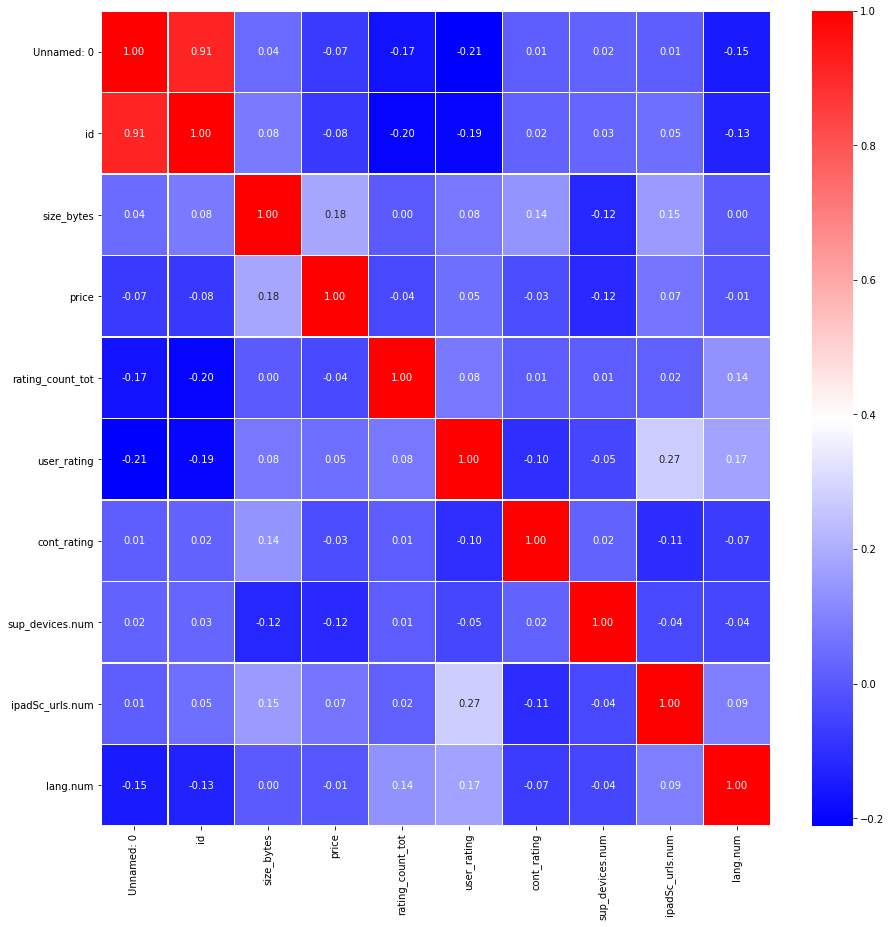

In [ ]:
# feature들 간의 상관계수 그래프
import matplotlib.pyplot as plt 
import seaborn as sns

df_corr = df_reg.corr(method='pearson')
plt.figure(figsize=(15,15))
sns.heatmap(df_corr, annot=True, 
fmt = '.2f', linewidths=.5, cmap='bwr')

# **DivideRating5 : 다섯 구간으로 나눈 결과**
*   **0~2**
*   **2~4**
*   **4~6**
*   **6~8**
*   **8~10**


## **Linear Regression**





In [ ]:
# train data, validation data, test data = 8 : 1 : 1
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_x_reg, df_y_reg, test_size = 0.1, random_state = 1)

In [ ]:
y_train

,user_rating
4158,0
1941,4
6524,4
1233,4
331,4
...,...
905,0
5192,4
3980,4
235,3


In [ ]:
y_test

,user_rating
4760,4
1999,4
343,4
2623,4
573,4
...,...
311,4
3206,0
6691,4
3954,4


In [ ]:
# lasso regression 을 이용하여 5-fold cross validation 을 진행하였다.
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

index = 0
df_result = pd.DataFrame(columns=["index","alpha","test_score","test_score_avg","train_score","train_score_avg"])

# 각 alpha 값에 따라 lasso regression을 진행하고 R2 score가 어떻게 달라지는지를 결과를 저장하였다.
alphas = [0.0001,0.0002,0.0003,0.0004,0.0005,0.0001,0.0002,0.0003,0.0004,0.0005,0.001,0.002,0.003,0.004,0.005,
         0.006,0.007,0.008,0.009,0.01,0.02,0.03,0.04,0.1,0.2,0.3,0.4,0.5,1.0,2.0,5.0,10.0]

for i in range(len(alphas)):
    lr = Lasso(alpha=alphas[i], random_state=0)
    lr.fit(x_train, y_train)
    # print(str(alphas[i]) +" " + str(lr.coef_))
    cv_results = cross_validate(lr, x_train,y_train, cv=5, scoring=('r2'),return_train_score=True)
    df_result.loc[index,:] = [index,alphas[i],cv_results['test_score'],cv_results['test_score'].mean(),cv_results['train_score'],cv_results['train_score'].mean()]
    index = index + 1

df_result

,index,alpha,test_score,test_score_avg,train_score,train_score_avg
0,0,0.0001,"[0.1492481797855424, 0.17738614300943945, 0.15...",0.154256,"[0.1602972084030131, 0.1533700745048715, 0.158...",0.159024
1,1,0.0002,"[0.14924919502988898, 0.17738302071334555, 0.1...",0.154257,"[0.16029720234379774, 0.15337006834801192, 0.1...",0.159024
2,2,0.0003,"[0.149250206203285, 0.17737989437866464, 0.154...",0.154257,"[0.16029719224510575, 0.15337005808657944, 0.1...",0.159024
3,3,0.0004,"[0.14925121330570712, 0.177376764005578, 0.154...",0.154258,"[0.160297178106937, 0.15337004372057383, 0.158...",0.159024
4,4,0.0005,"[0.1492522163373564, 0.1773736295938103, 0.154...",0.154258,"[0.16029715992929117, 0.1533700252499952, 0.15...",0.159024
5,5,0.0001,"[0.1492481797855424, 0.17738614300943945, 0.15...",0.154256,"[0.1602972084030131, 0.1533700745048715, 0.158...",0.159024
6,6,0.0002,"[0.14924919502988898, 0.17738302071334555, 0.1...",0.154257,"[0.16029720234379774, 0.15337006834801192, 0.1...",0.159024
7,7,0.0003,"[0.149250206203285, 0.17737989437866464, 0.154...",0.154257,"[0.16029719224510575, 0.15337005808657944, 0.1...",0.159024
8,8,0.0004,"[0.14925121330570712, 0.177376764005578, 0.154...",0.154258,"[0.160297178106937, 0.15337004372057383, 0.158...",0.159024
9,9,0.0005,"[0.1492522163373564, 0.1773736295938103, 0.154...",0.154258,"[0.16029715992929117, 0.1533700252499952, 0.15...",0.159024


In [ ]:
#cross validation에서 트레이닝 단계와 테스트 단계의 점수차이가 크지 않고 lasso의 계수 손실때의 스코어 차이가 크지 않았다
# 최종적으로 lasso의 계수 손실 이전단계인 0.01의 alpha를 선택하였다.
#lr.score는 기본적으로 R^2 score를 반환한다.
lr = Lasso(alpha=0.01, random_state=0)
lr.fit(x_train, y_train)
print('R^2 score: %.6f' % lr.score(x_test,y_test)) #0.135883

R^2 score: 0.135948


## **Logistic regression**

In [ ]:
#LogisticRegression 학습 후 정확도 값을 출력
#정규화 C값은 1000을 사용
from sklearn.linear_model import LogisticRegression

index = 0
df_result = pd.DataFrame(columns=["index","test_score","test_score_avg","train_score","train_score_avg"])

lr = LogisticRegression(C=1000, random_state=0)
# print(str(alphas[i]) +" " + str(lr.coef_))
cv_results = cross_validate(lr, x_train,y_train.values.ravel(), cv=5, scoring=('accuracy'),return_train_score=True)
df_result.loc[index,:] = [index,cv_results['test_score'],cv_results['test_score'].mean(),cv_results['train_score'],cv_results['train_score'].mean()]

df_result

,index,test_score,test_score_avg,train_score,train_score_avg
0,0,"[0.6635802469135802, 0.6643518518518519, 0.664...",0.664351,"[0.6645435244161358, 0.6643505114842695, 0.664...",0.664351


In [ ]:
#LogisticRegression 학습 후 R2 score 값을 출력
#정규화 C값은 1000을 사용
from sklearn.linear_model import LogisticRegression

index = 0
df_result = pd.DataFrame(columns=["index","test_score","test_score_avg","train_score","train_score_avg"])

lr = LogisticRegression(C=1000, random_state=0)
# print(str(alphas[i]) +" " + str(lr.coef_))
cv_results = cross_validate(lr, x_train,y_train.values.ravel(), cv=5, scoring=('r2'),return_train_score=True)
df_result.loc[index,:] = [index,cv_results['test_score'],cv_results['test_score'].mean(),cv_results['train_score'],cv_results['train_score'].mean()]

df_result

,index,test_score,test_score_avg,train_score,train_score_avg
0,0,"[-0.333931191912604, -0.33283822508161776, -0....",-0.33277,"[-0.3324799923228099, -0.3327530497306195, -0....",-0.33277


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score

log =  LogisticRegression(C=1000, random_state=0) #로지스틱 회귀분석 시행

log.fit(x_train, y_train.values.ravel()) #모델의 정확도 확인

print('테스트 데이터셋 Accuracy : %.2f' % log.score(x_test, y_test.values.ravel()))
print('테스트 데이터셋 R2-score : %.2f' % r2_score(y_test.values.ravel(), log.predict(x_test)))

테스트 데이터셋 Accuracy : 0.66
테스트 데이터셋 R2-score : -0.35


# **DivideRating2 : 두 구간으로 나눈 결과**

*   **0~8**
*   **8~10**

## **Linear Regression**


In [ ]:
df_reg['user_rating'] = df['user_rating'].apply(DevideRating2)
x_train, x_test, y_train, y_test = train_test_split(df_x_reg, df_y_reg, test_size = 0.1)

#Linear Regression

index = 0
df_result = pd.DataFrame(columns=["index","alpha","test_score","test_score_avg","train_score","train_score_avg"])

alphas = [0.0001,0.0002,0.0003,0.0004,0.0005,0.0001,0.0002,0.0003,0.0004,0.0005,0.001,0.002,0.003,0.004,0.005,
         0.006,0.007,0.008,0.009,0.01,0.02,0.03,0.04,0.1,0.2,0.3,0.4,0.5,1.0,2.0,5.0,10.0]

for i in range(len(alphas)):
    lr1 = Lasso(alpha=alphas[i], random_state=0)
    lr1.fit(x_train, y_train)
    cv_results = cross_validate(lr1, x_train,y_train, cv=5, scoring=('r2'),return_train_score=True)
    df_result.loc[index,:] = [index,alphas[i],cv_results['test_score'],cv_results['test_score'].mean(),cv_results['train_score'],cv_results['train_score'].mean()]
    index = index + 1


lr1 = Lasso(alpha=0.01, random_state=0)
lr1.fit(x_train, y_train)
print('R^2 score: %.6f' % lr1.score(x_test,y_test))

R^2 score: 0.087186


## **Logistic regression**

In [ ]:
#Logistic Regression

index = 0
df_result = pd.DataFrame(columns=["index","test_score","test_score_avg","train_score","train_score_avg"])
lr1 = LogisticRegression(C=1000, max_iter=1000,random_state=0)
cv_results = cross_validate(lr1, x_train,y_train.values.ravel(), cv=5, scoring=('accuracy'),return_train_score=True)
df_result.loc[index,:] = [index,cv_results['test_score'],cv_results['test_score'].mean(),cv_results['train_score'],cv_results['train_score'].mean()]

df_result

,index,test_score,test_score_avg,train_score,train_score_avg
0,0,"[0.6635802469135802, 0.6635802469135802, 0.664...",0.663888,"[0.6639644856205366, 0.6639644856205366, 0.663...",0.663888


In [ ]:
#Logistic Regression

index = 0
df_result = pd.DataFrame(columns=["index","test_score","test_score_avg","train_score","train_score_avg"])
lr1 = LogisticRegression(C=1000, max_iter=1000,random_state=0)
cv_results = cross_validate(lr1, x_train,y_train.values.ravel(), cv=5, scoring=('r2'),return_train_score=True)
df_result.loc[index,:] = [index,cv_results['test_score'],cv_results['test_score'].mean(),cv_results['train_score'],cv_results['train_score'].mean()]

df_result

,index,test_score,test_score_avg,train_score,train_score_avg
0,0,"[-0.33520567656794786, -0.3352056765679483, -0...",-0.334829,"[-0.33473465032043426, -0.33473465032043426, -...",-0.334829


In [ ]:
log =  LogisticRegression(C=1000, random_state=0) #로지스틱 회귀분석 시행

log.fit(x_train, y_train.values.ravel()) #모델의 정확도 확인

print('테스트 데이터셋 Accuracy : %.2f' % log.score(x_test, y_test.values.ravel()))
print('테스트 데이터셋 R2-score : %.2f' % r2_score(y_test.values.ravel(), log.predict(x_test)))

테스트 데이터셋 Accuracy : 0.67
테스트 데이터셋 R2-score : -0.33


# **DivideRating11 : 11 구간으로 나눈 결과**
*   **0**
*   **1**
*   **2**
*   **3**
*   **4**
*   **5**
*   **6**
*   **7**
*   **8**
*   **9**
*   **10**

## **Linear regression**

In [ ]:
#Linear Regression
df_reg['user_rating'] = df['user_rating'].apply(DevideRating11)
df_y_reg = df_reg[['user_rating']]
df_x_reg = df_reg.drop('user_rating',1)


x_train, x_test, y_train, y_test = train_test_split(df_x_reg, df_y_reg, test_size = 0.1, random_state = 1)


index = 0
df_result = pd.DataFrame(columns=["index","alpha","test_score","test_score_avg","train_score","train_score_avg"])


alphas = [0.0001,0.0002,0.0003,0.0004,0.0005,0.0001,0.0002,0.0003,0.0004,0.0005,0.001,0.002,0.003,0.004,0.005,
         0.006,0.007,0.008,0.009,0.01,0.02,0.03,0.04,0.1,0.2,0.3,0.4,0.5,1.0,2.0,5.0,10.0]

for i in range(len(alphas)):
    lr2 = Lasso(alpha=alphas[i], random_state=0)
    lr2.fit(x_train, y_train)
    cv_results = cross_validate(lr2, x_train,y_train, cv=5, scoring=('r2'),return_train_score=True)
    df_result.loc[index,:] = [index,alphas[i],cv_results['test_score'],cv_results['test_score'].mean(),cv_results['train_score'],cv_results['train_score'].mean()]
    index = index + 1

lr2 = Lasso(alpha=0.01, random_state=0)
lr2.fit(x_train, y_train)

print('R^2 score: %.6f' % lr2.score(x_test,y_test)) #0.135883

R^2 score: 0.124740


## **Logistic regression**

In [ ]:
#Logistic Regression
index = 0
df_result = pd.DataFrame(columns=["index","test_score","test_score_avg","train_score","train_score_avg"])

lr2 = LogisticRegression(C=1000, max_iter=1000,random_state=1)
cv_results = cross_validate(lr2, x_train,y_train.values.ravel(), cv=5, scoring=('r2'),return_train_score=True)
df_result.loc[index,:] = [index,cv_results['test_score'],cv_results['test_score'].mean(),cv_results['train_score'],cv_results['train_score'].mean()]

df_result

,index,test_score,test_score_avg,train_score,train_score_avg
0,0,"[-0.4088188748289152, -0.40799167100468514, -0...",-0.407706,"[-0.4077647466497054, -0.4079714317611598, -0....",-0.407992


In [ ]:
#Logistic Regression
index = 0
df_result = pd.DataFrame(columns=["index","test_score","test_score_avg","train_score","train_score_avg"])

lr2 = LogisticRegression(C=1000, max_iter=1000,random_state=1)
cv_results = cross_validate(lr2, x_train,y_train.values.ravel(), cv=5, scoring=('accuracy'),return_train_score=True)
df_result.loc[index,:] = [index,cv_results['test_score'],cv_results['test_score'].mean(),cv_results['train_score'],cv_results['train_score'].mean()]

df_result

,index,test_score,test_score_avg,train_score,train_score_avg
0,0,"[0.36959876543209874, 0.36959876543209874, 0.3...",0.369924,"[0.3701988033198224, 0.3701988033198224, 0.369...",0.369924


In [ ]:
log =  LogisticRegression(C=1000, random_state=0) #로지스틱 회귀분석 시행

log.fit(x_train, y_train.values.ravel()) #모델의 정확도 확인

print('테스트 데이터셋 Accuracy : %.2f' % log.score(x_test, y_test.values.ravel()))
print('테스트 데이터셋 R2-score : %.2f' % r2_score(y_test.values.ravel(), log.predict(x_test)))

테스트 데이터셋 Accuracy : 0.37
테스트 데이터셋 R2-score : -0.44


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
